In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the Breast Cancer dataset using load_breast_cancer from sklearn.
data = load_breast_cancer()

In [3]:
# Partition the data into an 80% training set and a 20% test set.
# store 30 features in a variable X and target values in a variable y
# split the data into train and test data with test ratio of 0.2, to ensure the result is the same for every call, set random_state to 42
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale the features using StandardScaler for KNN.
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [5]:
# Model training
# KNN classifier model -> initially n_neighbors=5, update n_neighbors
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(scaled_X_train, y_train)
KNN_pred = KNN.predict(scaled_X_test)

# Decision Tree model -> use default first, update max_depth
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

# Random Forest model -> start with 100 trees(n_estimators=100), update max_depth and min_samples_split
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [13]:
# Evaluation steps
# Apply Accuracy, precision, recall, F1 score and confusion matrix for each model.

def evaluate_model(model_name, y_test, y_pred):
    # evaluations 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # show result
    print(f'{model_name} result:')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 score: {f1:.3f}')

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show()

KNN result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


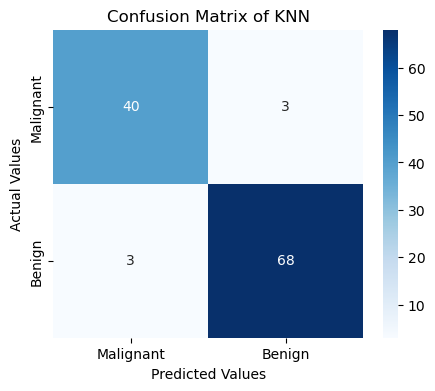

Decision Tree result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


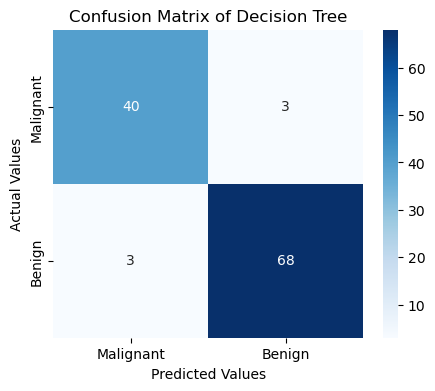

Random Forest result:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1 score: 0.972


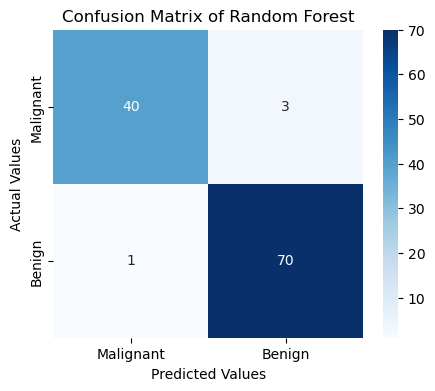

In [14]:
evaluate_model('KNN', y_test, KNN_pred)
evaluate_model('Decision Tree', y_test, DT_pred)
evaluate_model('Random Forest', y_test, RF_pred)

In [23]:
# define the lists of hyperparameters for each model
KNN_neighbors = [3, 5, 7, 9, 11, 13, 15, 17, 19]
DT_depth = [1, 3, 5, 7, 9, 11, 13, 15]
RF_depth = [1, 3, 5, 7, 9, 11, 13, 15]

In [24]:
def model_optimize(model_name, model, parameter_name, parameters, X_train, y_train, X_test, y_test):
    # initiate scores
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # loop through the parameters
    for i in range(len(parameters)):
        opt_model = model(**{parameter_name: parameters[i]})
        opt_model.fit(X_train, y_train)
        opt_pred = opt_model.predict(X_test)

        # calculate the scores
        accuracy = accuracy_score(y_test, opt_pred)
        precision = precision_score(y_test, opt_pred)
        recall = recall_score(y_test, opt_pred)
        f1 = f1_score(y_test, opt_pred)

        # append the scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # plot the scores
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 4, 1)
    plt.plot(parameters, accuracies, marker='o')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel(f'{parameter_name}')
    plt.ylabel('Accuracy')

    plt.subplot(1, 4, 2)
    plt.plot(parameters, precisions, marker='o')
    plt.title(f'{model_name} Precision')
    plt.xlabel(f'{parameter_name}')
    plt.ylabel('Precision')

    plt.subplot(1, 4, 3)
    plt.plot(parameters, recalls, marker='o')
    plt.title(f'{model_name} Recall')
    plt.xlabel(f'{parameter_name}')
    plt.ylabel('Recall')

    plt.subplot(1, 4, 4)
    plt.plot(parameters, f1_scores, marker='o')
    plt.title(f'{model_name} F1 Score')
    plt.xlabel(f'{parameter_name}')
    plt.tight_layout()

    plt.show()    

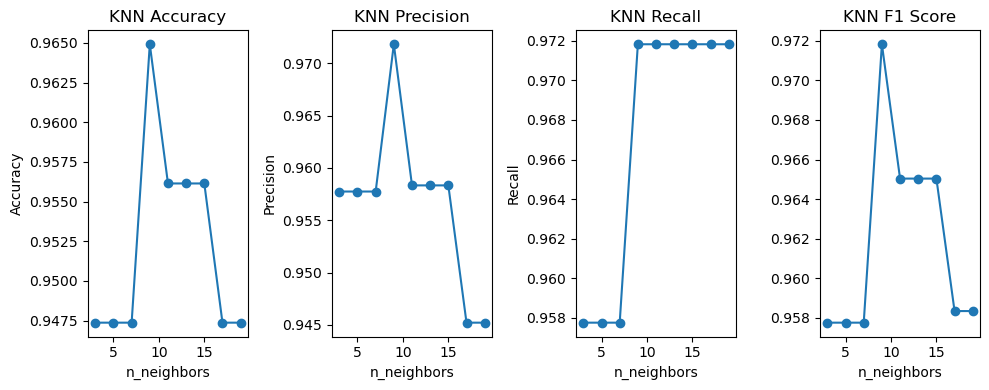

In [25]:
model_optimize('KNN', KNeighborsClassifier, 'n_neighbors', KNN_neighbors, scaled_X_train, y_train, scaled_X_test, y_test)

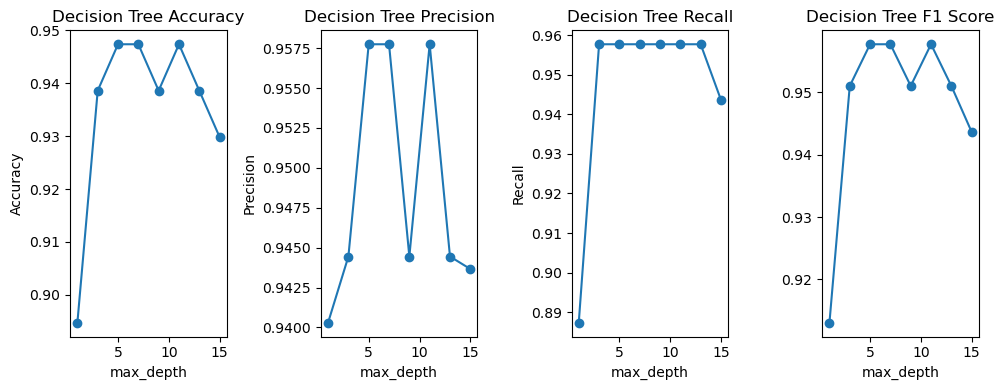

In [26]:
model_optimize("Decision Tree", DecisionTreeClassifier, 'max_depth', DT_depth, X_train, y_train, X_test, y_test)

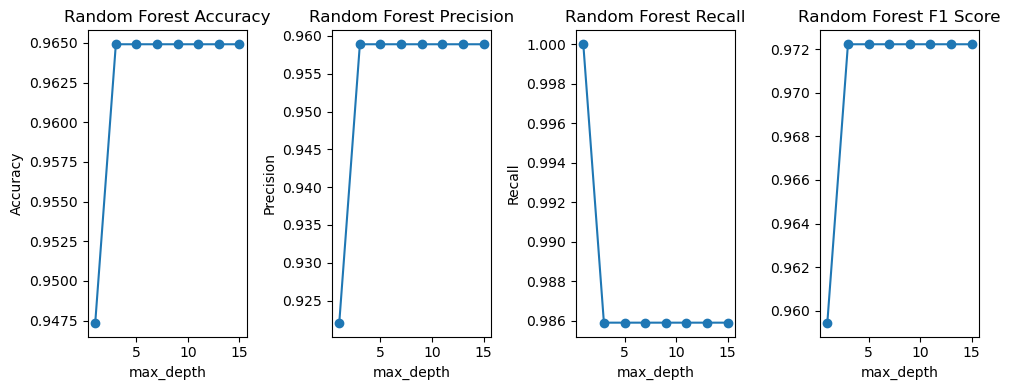

In [27]:
model_optimize("Random Forest", RandomForestClassifier, 'max_depth', RF_depth, X_train, y_train, X_test, y_test)